## RQ1:  How prevalent are refactorings in data access classes?

In [2]:
import pandas as pd
import subprocess
import json

In [3]:
#load the core data-set
data=pd.read_csv("../data/refactorings.csv",sep="$")

In [4]:
data.head()

,repo,sha,ref_id,ref_type,key,ref_desc,file_name,method_lines,lines,is_dac
0,oltpbenchmark_oltpbench,19d4727d8babaf165eebb20ffdc537253006c074,oltpbench-19d4727d8babaf165eebb20ffdc537253006...,Change Variable Type,b'wRYepah0BkPqrFALJFQ9h4sNbEJfeQfzxaTojPNF_cM=',b'gAAAAABg7M2-hxuiQKHyBRqmoCnulgCfDbyc_U6LDZOG...,['src/com/oltpbenchmark/api/Worker.java'],"[(355, 555)]","[(509, 509)]",False
1,oltpbenchmark_oltpbench,8e251e50ce7d1ae3671160ebc2d83cf433e6d1cf,oltpbench-8e251e50ce7d1ae3671160ebc2d83cf433e6...,Change Return Type,b'wRYepah0BkPqrFALJFQ9h4sNbEJfeQfzxaTojPNF_cM=',b'gAAAAABg7M2-8LGoiRXD4NEOIeygs8uTa7Tez0cyz-P5...,['src/com/oltpbenchmark/DistributionStatistics...,"[(166, 178)]","[(166, 166)]",False
2,oltpbenchmark_oltpbench,8e251e50ce7d1ae3671160ebc2d83cf433e6d1cf,oltpbench-8e251e50ce7d1ae3671160ebc2d83cf433e6...,Change Variable Type,b'wRYepah0BkPqrFALJFQ9h4sNbEJfeQfzxaTojPNF_cM=',b'gAAAAABg7M2-EXml1THsvNwS9Qg4i1sAIswpiVo7tK5h...,['src/com/oltpbenchmark/DistributionStatistics...,"[(166, 178)]","[(167, 167)]",False
3,oltpbenchmark_oltpbench,d97a34c952f90de191d76ab5efaf32860d58b1f7,oltpbench-d97a34c952f90de191d76ab5efaf32860d58...,Encapsulate Attribute,b'wRYepah0BkPqrFALJFQ9h4sNbEJfeQfzxaTojPNF_cM=',b'gAAAAABg7M2-K9VVgaBV-FC3mUMD5lPCt0CXN-y3L_dU...,['src/com/oltpbenchmark/api/Loader.java'],"[(81, 83)]","[(53, 53)]",True
4,oltpbenchmark_oltpbench,d77e70c06216df2e8f9f3948dc6c731e969a68fc,oltpbench-d77e70c06216df2e8f9f3948dc6c731e969a...,Change Return Type,b'wRYepah0BkPqrFALJFQ9h4sNbEJfeQfzxaTojPNF_cM=',b'gAAAAABg7M2-VSqXqnQgoA2r-DQo_BNdHFWL3yxlftLa...,['src/com/oltpbenchmark/DBWorkload.java'],"[(602, 631)]","[(602, 602)]",False


In [6]:
data.columns

Index(['repo', 'sha', 'ref_id', 'ref_type', 'key', 'ref_desc', 'file_name',
       'method_lines', 'lines', 'is_dac'],
      dtype='object')

In [7]:
#get the number of refactorings per project
data.groupby(by='repo').size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f5dfdd11d00>>

In [21]:
(18892*100)/len(data.index)

0.7639026481041935

In [8]:
#select subset 

rq1data=data.drop(columns=[ 'key', 'ref_desc','method_lines', 'lines'])
rq1data.head()

,repo,sha,ref_id,ref_type,file_name,is_dac
0,oltpbenchmark_oltpbench,19d4727d8babaf165eebb20ffdc537253006c074,oltpbench-19d4727d8babaf165eebb20ffdc537253006...,Change Variable Type,['src/com/oltpbenchmark/api/Worker.java'],False
1,oltpbenchmark_oltpbench,8e251e50ce7d1ae3671160ebc2d83cf433e6d1cf,oltpbench-8e251e50ce7d1ae3671160ebc2d83cf433e6...,Change Return Type,['src/com/oltpbenchmark/DistributionStatistics...,False
2,oltpbenchmark_oltpbench,8e251e50ce7d1ae3671160ebc2d83cf433e6d1cf,oltpbench-8e251e50ce7d1ae3671160ebc2d83cf433e6...,Change Variable Type,['src/com/oltpbenchmark/DistributionStatistics...,False
3,oltpbenchmark_oltpbench,d97a34c952f90de191d76ab5efaf32860d58b1f7,oltpbench-d97a34c952f90de191d76ab5efaf32860d58...,Encapsulate Attribute,['src/com/oltpbenchmark/api/Loader.java'],True
4,oltpbenchmark_oltpbench,d77e70c06216df2e8f9f3948dc6c731e969a68fc,oltpbench-d77e70c06216df2e8f9f3948dc6c731e969a...,Change Return Type,['src/com/oltpbenchmark/DBWorkload.java'],False


In [9]:
#evaluate the list of file Names
rq1data["file_name"]=rq1data["file_name"].apply(eval)
rq1data["file_name"].tolist()[0]

['src/com/oltpbenchmark/api/Worker.java']

# Task 1: summary of refactoring types on DAC and regular classes

In [10]:
dac=rq1data[rq1data["is_dac"]==True]
regular=rq1data[rq1data["is_dac"]==False]
total_dac=len(dac.index)
total_reg=len(regular.index)
print("Length of dac: {}".format(total_dac))
print("Length of regular: {}".format(total_reg))

Length of dac: 18892
Length of regular: 2454198


In [11]:
dac_ref_counts=dac.groupby(by=["ref_type"]).count().sort_values(by="ref_id", ascending=False)
reg_ref_counts=regular.groupby(by=["ref_type"]).count().sort_values(by="ref_id", ascending=False)

In [12]:
def compute_percentage(count,total):
    return count*100/total

In [13]:

dac_ref_counts['Refactoring Type'] = dac_ref_counts.index
dac_ref_counts=dac_ref_counts[["Refactoring Type","ref_id"]]
dac_ref_counts.columns=['Refactoring Type', 'count']

In [14]:
reg_ref_counts['Refactoring Type'] = reg_ref_counts.index
reg_ref_counts=reg_ref_counts[["Refactoring Type","ref_id"]]
reg_ref_counts.columns=['Refactoring Type', 'count']

In [15]:
#Most prevalent refactoring Types in DAC classes
dac_ref_counts["percentage"]=dac_ref_counts["count"].apply(compute_percentage, args=(total_dac,))
dac_ref_counts_t10=dac_ref_counts.head(10)
dac_ref_counts_t10

,Refactoring Type,count,percentage
ref_type,,,
Rename Variable,Rename Variable,1880,9.951302
Change Variable Type,Change Variable Type,1539,8.146305
Add Parameter,Add Parameter,1119,5.923142
Add Parameter Modifier,Add Parameter Modifier,998,5.282659
Change Parameter Type,Change Parameter Type,910,4.816854
Rename Parameter,Rename Parameter,888,4.700402
Extract Method,Extract Method,887,4.695109
Add Method Annotation,Add Method Annotation,816,4.319289
Rename Method,Rename Method,705,3.731738


In [16]:
def format_number(number):
    return round(number,3)

In [17]:
dac_ref_counts_t10["percentage"]=dac_ref_counts_t10["percentage"].apply(format_number)

<ipython-input-17-bacc6a1c38f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dac_ref_counts_t10["percentage"]=dac_ref_counts_t10["percentage"].apply(format_number)


In [18]:
#get a latex table from this
dac_t10_latex=dac_ref_counts_t10.to_latex(columns=["Refactoring Type","count","percentage"], index=False)
print(dac_t10_latex)

\begin{tabular}{lrr}
\toprule
              Refactoring Type &  count &  percentage \\
               Rename Variable &   1880 &       9.951 \\
\midrule
          Change Variable Type &   1539 &       8.146 \\
                 Add Parameter &   1119 &       5.923 \\
        Add Parameter Modifier &    998 &       5.283 \\
         Change Parameter Type &    910 &       4.817 \\
              Rename Parameter &    888 &       4.700 \\
                Extract Method &    887 &       4.695 \\
         Add Method Annotation &    816 &       4.319 \\
                 Rename Method &    705 &       3.732 \\
 Change Method Access Modifier &    620 &       3.282 \\
\bottomrule
\end{tabular}



In [19]:
dac_ref_counts_t10

,Refactoring Type,count,percentage
ref_type,,,
Rename Variable,Rename Variable,1880,9.951
Change Variable Type,Change Variable Type,1539,8.146
Add Parameter,Add Parameter,1119,5.923
Add Parameter Modifier,Add Parameter Modifier,998,5.283
Change Parameter Type,Change Parameter Type,910,4.817
Rename Parameter,Rename Parameter,888,4.700
Extract Method,Extract Method,887,4.695
Add Method Annotation,Add Method Annotation,816,4.319
Rename Method,Rename Method,705,3.732


In [20]:
#Most prevalent refactoring Types in regular classes
reg_ref_counts["percentage"]=reg_ref_counts["count"].apply(compute_percentage, args=(total_reg,))
reg_ref_counts_t10=reg_ref_counts.head(10)
reg_ref_counts_t10

,Refactoring Type,count,percentage
ref_type,,,
Move Attribute,Move Attribute,1470365,59.912240
Change Attribute Access Modifier,Change Attribute Access Modifier,600345,24.461963
Add Method Annotation,Add Method Annotation,26913,1.096611
Rename Method,Rename Method,22963,0.935662
Change Parameter Type,Change Parameter Type,21618,0.880858
Change Variable Type,Change Variable Type,21372,0.870834
Change Return Type,Change Return Type,19459,0.792886
Add Parameter,Add Parameter,18528,0.754951
Rename Variable,Rename Variable,18345,0.747495


In [21]:
reg_ref_counts_t10["percentage"]=reg_ref_counts_t10["percentage"].apply(format_number)

<ipython-input-21-b2bff01a49a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_ref_counts_t10["percentage"]=reg_ref_counts_t10["percentage"].apply(format_number)


In [22]:
#get a latex table for t10 regular
reg_t10_latex=reg_ref_counts_t10.to_latex(columns=["Refactoring Type","count","percentage"], index=False)
print(reg_t10_latex)

\begin{tabular}{lrr}
\toprule
                 Refactoring Type &    count &  percentage \\
                   Move Attribute &  1470365 &      59.912 \\
\midrule
 Change Attribute Access Modifier &   600345 &      24.462 \\
            Add Method Annotation &    26913 &       1.097 \\
                    Rename Method &    22963 &       0.936 \\
            Change Parameter Type &    21618 &       0.881 \\
             Change Variable Type &    21372 &       0.871 \\
               Change Return Type &    19459 &       0.793 \\
                    Add Parameter &    18528 &       0.755 \\
                  Rename Variable &    18345 &       0.747 \\
                 Rename Parameter &    16107 &       0.656 \\
\bottomrule
\end{tabular}



In [27]:
#explore why move attribute is the most dominant
#lets takeout adempiere and re-do
regular2=regular[regular["repo"]=="adempiere_adempiere"]
reg_ref_counts=regular2.groupby(by=["ref_type"]).count().sort_values(by="ref_id", ascending=False)
reg_ref_counts=reg_ref_counts.reset_index()
reg_ref_counts

,ref_type,repo,sha,ref_id,file_name,is_dac
0,Move Attribute,1466541,1466541,1466541,1466541,1466541
1,Change Attribute Access Modifier,594554,594554,594554,594554,594554
2,Pull Up Attribute,8872,8872,8872,8872,8872
3,Change Return Type,5685,5685,5685,5685,5685
4,Rename Method,3400,3400,3400,3400,3400
...,...,...,...,...,...,...
63,Add Parameter Annotation,3,3,3,3,3
64,Split Attribute,2,2,2,2,2
65,Modify Method Annotation,2,2,2,2,2
66,Extract Subclass,1,1,1,1,1


In [29]:
#all included
regular2=regular[regular["repo"]!="adempiere_adempiere"]
reg_ref_counts=regular.groupby(by=["ref_type"]).count().sort_values(by="ref_id", ascending=False)
reg_ref_counts=reg_ref_counts.reset_index()
reg_ref_counts

,ref_type,repo,sha,ref_id,file_name,is_dac
0,Move Attribute,1470365,1470365,1470365,1470365,1470365
1,Change Attribute Access Modifier,600345,600345,600345,600345,600345
2,Add Method Annotation,26913,26913,26913,26913,26913
3,Rename Method,22963,22963,22963,22963,22963
4,Change Parameter Type,21618,21618,21618,21618,21618
...,...,...,...,...,...,...
69,Move And Rename Attribute,45,45,45,45,45
70,Split Attribute,42,42,42,42,42
71,Remove Variable Annotation,42,42,42,42,42
72,Replace Attribute,20,20,20,20,20


In [28]:
regular2=regular[regular["repo"]!="adempiere_adempiere"]
reg_ref_counts=regular2.groupby(by=["ref_type"]).count().sort_values(by="ref_id", ascending=False)
reg_ref_counts=reg_ref_counts.reset_index()
reg_ref_counts

,ref_type,repo,sha,ref_id,file_name,is_dac
0,Add Method Annotation,26320,26320,26320,26320,26320
1,Change Parameter Type,20900,20900,20900,20900,20900
2,Change Variable Type,20138,20138,20138,20138,20138
3,Rename Method,19563,19563,19563,19563,19563
4,Add Parameter,17682,17682,17682,17682,17682
...,...,...,...,...,...,...
69,Remove Variable Annotation,42,42,42,42,42
70,Split Attribute,40,40,40,40,40
71,Move And Rename Attribute,39,39,39,39,39
72,Replace Attribute,19,19,19,19,19


In [38]:
#identifying the types commnly prevalent in dac and regular classes
dac_set=set(dac_ref_counts.head(10)["Refactoring Type"].tolist())
reg_set=set(reg_ref_counts.head(10)["Refactoring Type"].tolist())

In [39]:
#Commonly prevalent
dac_set & reg_set

{'Add Method Annotation',
 'Add Parameter',
 'Change Parameter Type',
 'Change Variable Type',
 'Rename Method',
 'Rename Parameter',
 'Rename Variable'}

In [40]:
#Prevalent in dac
dac_set - reg_set

{'Add Parameter Modifier', 'Change Method Access Modifier', 'Extract Method'}

In [41]:
#Prevalent in reg
reg_set-dac_set 

{'Change Attribute Access Modifier', 'Change Return Type', 'Move Attribute'}

In [42]:
#dac rare refactoring types
dac_ref_counts.tail(10)

,Refactoring Type,count,percentage
ref_type,,,
Remove Attribute Annotation,Remove Attribute Annotation,8,0.042346
Remove Variable Annotation,Remove Variable Annotation,7,0.037053
Split Variable,Split Variable,5,0.026466
Merge Attribute,Merge Attribute,4,0.021173
Split Parameter,Split Parameter,3,0.015880
Move And Rename Attribute,Move And Rename Attribute,3,0.015880
Remove Parameter Annotation,Remove Parameter Annotation,2,0.010586
Replace Attribute,Replace Attribute,2,0.010586
Push Down Attribute,Push Down Attribute,2,0.010586


In [43]:
#Least prevalent regular refactoring Types
reg_ref_counts.tail(10)

,Refactoring Type,count,percentage
ref_type,,,
Add Variable Annotation,Add Variable Annotation,145,0.005908
Extract Subclass,Extract Subclass,110,0.004482
Merge Attribute,Merge Attribute,101,0.004115
Merge Variable,Merge Variable,97,0.003952
Split Parameter,Split Parameter,73,0.002974
Move And Rename Attribute,Move And Rename Attribute,45,0.001834
Split Attribute,Split Attribute,42,0.001711
Remove Variable Annotation,Remove Variable Annotation,42,0.001711
Replace Attribute,Replace Attribute,20,0.000815


In [44]:
def check_length(fileNames):
    return len(fileNames)

In [45]:
dac["no_of_files"]=dac["file_name"].apply(check_length)

/tmp/ipykernel_182639/2914363803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dac["no_of_files"]=dac["file_name"].apply(check_length)


In [46]:
regular["no_of_files"]=regular["file_name"].apply(check_length)

/tmp/ipykernel_182639/3259838026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular["no_of_files"]=regular["file_name"].apply(check_length)


In [47]:
dac.head()

,repo,sha,ref_id,ref_type,file_name,is_dac,no_of_files
3,oltpbench,d97a34c952f90de191d76ab5efaf32860d58b1f7,oltpbench-d97a34c952f90de191d76ab5efaf32860d58...,Encapsulate Attribute,[src/com/oltpbenchmark/api/Loader.java],True,1
13,oltpbench,d77ff02e21a0b56e74ad35bb8cd53e9a5ea44194,oltpbench-d77ff02e21a0b56e74ad35bb8cd53e9a5ea4...,Extract Subclass,[src/com/oltpbenchmark/api/collectors/NoopColl...,True,2
16,oltpbench,35114287311ebd257fa4cdf440d754f420163149,oltpbench-35114287311ebd257fa4cdf440d754f42016...,Add Parameter,[src/com/oltpbenchmark/benchmarks/tpch/TPCHLoa...,True,1
17,oltpbench,35114287311ebd257fa4cdf440d754f420163149,oltpbench-35114287311ebd257fa4cdf440d754f42016...,Add Parameter,[src/com/oltpbenchmark/benchmarks/tpch/TPCHLoa...,True,1
18,oltpbench,35114287311ebd257fa4cdf440d754f420163149,oltpbench-35114287311ebd257fa4cdf440d754f42016...,Add Parameter,[src/com/oltpbenchmark/benchmarks/tpch/TPCHLoa...,True,1


In [48]:
#expand the file names
dac_exploded=dac.explode("file_name")
reg_exploded=regular.explode("file_name")

In [49]:
#recheck DAC
paths_df=pd.read_csv("../data/DAC_paths.csv")
def check_dac(row):
    repo= row["repo"]
    file_name=row["file_name"]
    dac_paths=paths_df[paths_df["repoName"]==repo]["className"].tolist()
    return file_name in dac_paths

In [50]:
paths_df.head()

,repoName,className
0,querydsl,querydsl-sql/src/main/java/com/mysema/query/sq...
1,querydsl,querydsl-sql/src/main/java/com/querydsl/sql/dm...
2,querydsl,querydsl-sql-codegen/src/test/java/com/mysema/...
3,querydsl,querydsl-sql/src/test/java/com/mysema/query/sq...
4,querydsl,querydsl-sql/src/test/java/com/mysema/query/sq...


In [51]:
paths_df[paths_df['className']=='base/src/org/compiere/model/I_I_Order.java']

,repoName,className


In [52]:
len(dac_exploded.index)

50482

In [53]:
dac_exploded["is_dac"]=dac_exploded.apply(check_dac, axis=1)

In [54]:
dac_exploded_false= dac_exploded[dac_exploded["is_dac"]==False]

In [67]:
#concatinate the non-data access classes
reg_exploded=pd.concat([reg_exploded, dac_exploded_false])
dac_exploded=dac_exploded[dac_exploded["is_dac"]==True]
exploded=pd.concat([reg_exploded, dac_exploded])
exploded.to_csv("RQ1-exploded-data.csv", index=False)

In [85]:
2454198/81857

29.981528763575504

In [84]:
18892/1318

14.333839150227618

In [2]:
#Check if code size is a co-founding factor
df=pd.read_csv("RQ1-exploded-data-code-size.csv")

In [8]:
df.loc[df['is_dac'] == True, 'is_dac'] = "DAC"
df.loc[df['is_dac'] == False, 'is_dac'] = "Regular"
df.head()


,repo,sha,ref_id,ref_type,file_name,is_dac,no_of_files,code_size
0,oltpbench,19d4727d8babaf165eebb20ffdc537253006c074,oltpbench-19d4727d8babaf165eebb20ffdc537253006...,Change Variable Type,src/com/oltpbenchmark/api/Worker.java,Regular,1,367
1,oltpbench,8e251e50ce7d1ae3671160ebc2d83cf433e6d1cf,oltpbench-8e251e50ce7d1ae3671160ebc2d83cf433e6...,Change Return Type,src/com/oltpbenchmark/DistributionStatistics.java,Regular,1,122
2,oltpbench,8e251e50ce7d1ae3671160ebc2d83cf433e6d1cf,oltpbench-8e251e50ce7d1ae3671160ebc2d83cf433e6...,Change Variable Type,src/com/oltpbenchmark/DistributionStatistics.java,Regular,1,122
3,oltpbench,d77e70c06216df2e8f9f3948dc6c731e969a68fc,oltpbench-d77e70c06216df2e8f9f3948dc6c731e969a...,Change Return Type,src/com/oltpbenchmark/DBWorkload.java,Regular,1,668
4,oltpbench,b7f81829dee48fd2f99e4e43767919cdbcb034c3,oltpbench-b7f81829dee48fd2f99e4e43767919cdbcb0...,Add Parameter,src/com/oltpbenchmark/Phase.java,Regular,1,169


In [13]:
df["repo"].value_counts()

adempiere               2114101
eclipselink              164631
xipki                     94777
dotCMS-core               78163
querydsl                  43382
WordPress-Android         33383
carbon-apimgt             33055
deegree-3                 23915
MyExpenses                11103
oltpbench                  2490
Applozic-Android-SDK       2343
direct-app                 1585
Name: repo, dtype: int64

In [12]:
bad=df[df["code_size"]==-1]
bad["repo"].value_counts()

xipki                   94777
eclipselink                50
dotCMS-core                15
deegree-3                  11
adempiere                  10
carbon-apimgt              10
querydsl                    8
WordPress-Android           5
MyExpenses                  5
oltpbench                   2
Applozic-Android-SDK        1
Name: repo, dtype: int64

In [21]:
df.to_csv("RQ1-exploded-data-code-size.csv", index=False)

In [22]:
df=df[df["code_size"]!=-1]

In [26]:
df.loc[df['is_dac'] == True, 'is_dac'] = "DAC"
df.loc[df['is_dac'] == False, 'is_dac'] = "Regular"

In [27]:
df.to_csv("RQ1-exploded-data-code-size-R.csv", index=False)

In [28]:
import math
df["code_size_sqrt"]=df["code_size"].apply(math.sqrt)

<AxesSubplot:title={'center':'code_size_sqrt'}, xlabel='is_dac'>

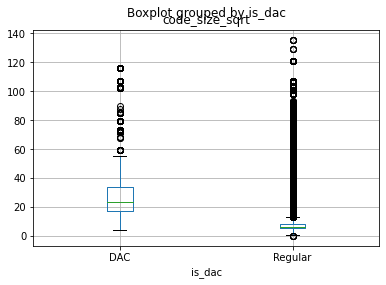

In [29]:
#lets see if there is a signficant difference in code size
df.boxplot(column="code_size_sqrt", by="is_dac")

In [30]:
df.groupby(by=["is_dac"])["code_size"].describe()

,count,mean,std,min,25%,50%,75%,max
is_dac,,,,,,,,
DAC,14479.0,1547.996132,2981.677692,15.0,310.0,563.0,1159.0,13501.0
Regular,2524500.0,145.754927,690.322972,0.0,30.0,42.0,74.0,18383.0


In [31]:
#now compute relative refactoring frequency
df.columns

Index(['repo', 'sha', 'ref_id', 'ref_type', 'file_name', 'is_dac',
       'no_of_files', 'code_size', 'code_size_sqrt'],
      dtype='object')

In [68]:
#split df in to dac and regular
df=df[df['code_size']>0]
dac_df=df[df["is_dac"]=='DAC']
reg_df=df[df["is_dac"]=='Regular']

In [69]:
len(dac_df.index)

14479

In [70]:
len(reg_df.index)

2524495

In [71]:
len(df.index)-len(reg_df.index)

14479

,repo,sha,ref_id,ref_type,file_name,is_dac,no_of_files,code_size,code_size_sqrt
79534,dotCMS-core,ef1b51853b8f108d9b514b9d0436d4fde1006d16,dotCMS-core-ef1b51853b8f108d9b514b9d0436d4fde1...,Change Return Type,src/com/dotmarketing/portlets/rules/business/N...,Regular,1,0,0.0
79535,dotCMS-core,ef1b51853b8f108d9b514b9d0436d4fde1006d16,dotCMS-core-ef1b51853b8f108d9b514b9d0436d4fde1...,Change Parameter Type,src/com/dotmarketing/portlets/rules/business/N...,Regular,1,0,0.0
79536,dotCMS-core,ef1b51853b8f108d9b514b9d0436d4fde1006d16,dotCMS-core-ef1b51853b8f108d9b514b9d0436d4fde1...,Rename Method,src/com/dotmarketing/portlets/rules/business/N...,Regular,1,0,0.0
80924,dotCMS-core,09e80fe4388b5328418077e423ab334b6115b7b8,dotCMS-core-09e80fe4388b5328418077e423ab334b61...,Inline Method,src/com/dotmarketing/filters/RulesEngineFilter...,Regular,1,0,0.0
80942,dotCMS-core,c39c58711cc1ab4b60e5d2c7910b40a73d5ce9c8,dotCMS-core-c39c58711cc1ab4b60e5d2c7910b40a73d...,Extract Method,src/com/dotmarketing/filters/RulesEngineFilter...,Regular,1,0,0.0


In [72]:
dac_summary=dac_df.groupby(by="file_name")["code_size"].describe().reset_index()
reg_summary=reg_df.groupby(by="file_name")["code_size"].describe().reset_index()

In [73]:
dac_summary.columns

Index(['file_name', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [74]:
dac_summary.drop(columns=['std', 'min', '25%', '50%', '75%','max'], inplace=True)
dac_summary.columns=['file_name', 'no_of_refactorings', 'avg_code_size']
dac_summary["sqrt_avg_code_size"]=dac_summary["avg_code_size"].apply(math.sqrt)
dac_summary

,file_name,no_of_refactorings,avg_code_size,sqrt_avg_code_size
0,JasperReports/src/org/compiere/report/ReportSt...,15.0,813.266667,28.517831
1,WEB-INF/src/com/_3e/ADInterface/ADLookup.java,3.0,383.000000,19.570386
2,WEB-INF/src/com/_3e/ADInterface/CompiereServic...,3.0,201.000000,14.177447
3,WEB-INF/src/com/_3e/ADInterface/InfoProduct.java,1.0,310.000000,17.606817
4,WEB-INF/src/com/_3e/ADInterface/ModelADService...,20.0,606.500000,24.627221
...,...,...,...,...
1313,zkwebui/WEB-INF/src/org/adempiere/webui/window...,35.0,789.171429,28.092195
1314,zkwebui/WEB-INF/src/org/compiere/pos/WQueryBPa...,1.0,277.000000,16.643317
1315,zkwebui/WEB-INF/src/org/compiere/pos/WQueryTic...,2.0,249.000000,15.779734
1316,zkwebui/WEB-INF/src/org/eevolution/form/WBrows...,55.0,672.727273,25.936987


In [75]:
reg_summary.drop(columns=['std', 'min', '25%', '50%', '75%','max'], inplace=True)
reg_summary.columns=['file_name', 'no_of_refactorings', 'avg_code_size']
reg_summary["sqrt_avg_code_size"]=reg_summary["avg_code_size"].apply(math.sqrt)

In [76]:
dac_summary["is_dac"]="DAC"
reg_summary["is_dac"]="Regular"
summary=pd.concat([dac_summary, reg_summary])
summary["Relative frequency"]=summary["no_of_refactorings"]/summary["sqrt_avg_code_size"]
summary

,file_name,no_of_refactorings,avg_code_size,sqrt_avg_code_size,is_dac,Relative frequency
0,JasperReports/src/org/compiere/report/ReportSt...,15.0,813.266667,28.517831,DAC,0.525987
1,WEB-INF/src/com/_3e/ADInterface/ADLookup.java,3.0,383.000000,19.570386,DAC,0.153293
2,WEB-INF/src/com/_3e/ADInterface/CompiereServic...,3.0,201.000000,14.177447,DAC,0.211604
3,WEB-INF/src/com/_3e/ADInterface/InfoProduct.java,1.0,310.000000,17.606817,DAC,0.056796
4,WEB-INF/src/com/_3e/ADInterface/ModelADService...,20.0,606.500000,24.627221,DAC,0.812110
...,...,...,...,...,...,...
81852,zkwebui/WEB-INF/src/org/eevolution/grid/WBrows...,4.0,695.000000,26.362853,Regular,0.151729
81853,zkwebui/WEB-INF/src/org/spin/apps/form/WBankSt...,6.0,405.500000,20.137031,Regular,0.297959
81854,zkwebui/WEB-INF/test/src/org/adempiere/webui/c...,1.0,9.000000,3.000000,Regular,0.333333
81855,zkwebui/WEB-INF/test/src/org/adempiere/webui/c...,23.0,115.000000,10.723805,Regular,2.144761


In [57]:
summary.dtypes

file_name              object
no_of_refactorings    float64
avg_code_size         float64
sqrt_acg_code_size    float64
is_dac                 object
Relative frequency    float64
dtype: object

In [59]:
23/10.72

2.1455223880597014

In [78]:
summary["Relative frequency"].describe()

count    83175.000000
mean         4.501447
std         49.420818
min          0.009719
25%          0.174078
50%          0.333333
75%          0.662777
max       1377.022553
Name: Relative frequency, dtype: float64

In [79]:
summary[summary["Relative frequency"]>1377.02]

,file_name,no_of_refactorings,avg_code_size,sqrt_avg_code_size,is_dac,Relative frequency
17980,dotCMS/src/main/java/com/dotmarketing/portlets...,29339.0,453.95051,21.306114,Regular,1377.022553


In [81]:
summary.columns=['file_name', 'no_of_refactorings', 'avg_code_size',
       'sqrt_avg_code_size', 'is_dac', 'Relative_frequency']

In [82]:
summary.to_csv("RQ1-Relative-frequency.csv", index=False)

In [83]:
18892/1318

14.333839150227618

In [87]:
summary.groupby(by="is_dac")["Relative_frequency"].describe()

,count,mean,std,min,25%,50%,75%,max
is_dac,,,,,,,,
DAC,1318.0,0.515017,0.993506,0.009719,0.075378,0.176406,0.505109,13.805077
Regular,81857.0,4.565634,49.814334,0.011975,0.174741,0.335410,0.666667,1377.022553


In [91]:
dac=summary[summary["is_dac"]=="DAC"]
reg=summary[summary["is_dac"]=="Regular"]

In [93]:
dac_top=dac.sort_values(by="Relative_frequency", ascending=False).head(5)

,file_name,no_of_refactorings,avg_code_size,sqrt_avg_code_size,is_dac,Relative_frequency
859,querydsl-sql/src/main/java/com/mysema/query/sq...,296.0,459.733108,21.441388,DAC,13.805077
765,org.adempiere.pos/src/main/java/base/org/ademp...,388.0,973.520619,31.201292,DAC,12.435383
421,components/apimgt/org.wso2.carbon.apimgt.impl/...,1092.0,11156.557692,105.624607,DAC,10.338500
1059,src/org/wordpress/android/WordPressDB.java,330.0,1392.000000,37.309516,DAC,8.844928
172,base/src/org/compiere/model/Query.java,183.0,500.049180,22.361779,DAC,8.183606


In [98]:
dac_top["file_name"].tolist()

['querydsl-sql/src/main/java/com/mysema/query/sql/AbstractSQLQuery.java',
 'org.adempiere.pos/src/main/java/base/org/adempiere/pos/service/CPOS.java',
 'components/apimgt/org.wso2.carbon.apimgt.impl/src/main/java/org/wso2/carbon/apimgt/impl/dao/ApiMgtDAO.java',
 'src/org/wordpress/android/WordPressDB.java',
 'base/src/org/compiere/model/Query.java']